In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install kiwipiepy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd

C:\Users\cmhcm\AppData\Local\Temp\ipykernel_12856\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 14781개 뉴스 데이터 가져오기
- 풀본문 있는 데이터 입니다.

In [7]:
data_path = "C:/dev/openAI/result_df_14761.csv"
df = pd.read_csv(data_path, dtype=str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_id       14761 non-null  object
 1   news_date     14761 non-null  object
 2   news_keyword  14761 non-null  object
 3   news_feature  14761 non-null  object
 4   news_url      14686 non-null  object
 5   news_content  14761 non-null  object
 6   img_url       13992 non-null  object
dtypes: object(7)
memory usage: 807.4+ KB


# 중복제거 로직
- 형태소 분석기: Okt
- 벡터화: CountVectorizer
- 중복 기준: news_content 컬럼 데이터

In [8]:
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

In [9]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

# 전처리 함수 정의
def tokenizer(raw, pos=["Noun", "Alpha", "Number"], stopword=[]):
    return [
        word for word, tag in okt.pos(
            raw,
            norm=True,
            stem=True
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

## 전처리 및 벡터화

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer(
    tokenizer=tokenizer,
    min_df=2
)

In [11]:
# 기사 본문에 나오는 단어의 빈도 계산
X = vectorize.fit_transform(df['news_content'])

c:\Users\cmhcm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
cos_sim = cosine_similarity(X)

# 코사인 유사도가 0.9 이상인 경우를 중복으로 판단
dup_idx = np.where(cos_sim > 0.9)

In [13]:
# 중복 기사 인덱스와 제목 출력 및 중복 기사 제거
to_drop = []

for i in range(len(dup_idx[0])):
    if dup_idx[0][i] != dup_idx[1][i]:  # 자기 자신과의 유사도는 제외

        # 먼저 게시된 기사를 남기고 싶으므로 인덱스가 더 작은 행을 제거
        to_remove = min(dup_idx[0][i], dup_idx[1][i])
        print("삭제되는 기사 제목: ", df.iloc[to_remove]['news_id'])
        print()

        to_drop.append(to_remove)

# 중복 기사 제거
df = df.drop(to_drop)
# 인덱스 재설정
df = df.reset_index(drop=True)

삭제되는 기사 제목:  02100101.20240213143503002

삭제되는 기사 제목:  02100101.20240213143503002

삭제되는 기사 제목:  02100501.20240212184757001

삭제되는 기사 제목:  02100501.20240212180734001

삭제되는 기사 제목:  02100501.20240212180734001

삭제되는 기사 제목:  07100501.20240212103856001

삭제되는 기사 제목:  07100501.20240212103856001

삭제되는 기사 제목:  02100501.20240212184757001

삭제되는 기사 제목:  07101201.20240207190030002

삭제되는 기사 제목:  02100801.20240207152738001

삭제되는 기사 제목:  07101201.20240207190030002

삭제되는 기사 제목:  02100801.20240207152738001

삭제되는 기사 제목:  07100501.20240207141448001

삭제되는 기사 제목:  02100851.20240207111614001

삭제되는 기사 제목:  02100851.20240207111614001

삭제되는 기사 제목:  02100851.20240207111614001

삭제되는 기사 제목:  02100851.20240207111502001

삭제되는 기사 제목:  02100851.20240207111614001

삭제되는 기사 제목:  02100851.20240207111502001

삭제되는 기사 제목:  07100501.20240207141448001

삭제되는 기사 제목:  02100311.20240207103903001

삭제되는 기사 제목:  02100311.20240207103903001

삭제되는 기사 제목:  01400351.20240206220218003

삭제되는 기사 제목:  01400351.20240206220218003

삭제되는 기사 제목:  015

### 4,353개의 중복기사 제거

In [14]:
# 중복제거 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10429 entries, 0 to 10428
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_id       10429 non-null  object
 1   news_date     10429 non-null  object
 2   news_keyword  10429 non-null  object
 3   news_feature  10429 non-null  object
 4   news_url      10368 non-null  object
 5   news_content  10429 non-null  object
 6   img_url       9820 non-null   object
dtypes: object(7)
memory usage: 570.5+ KB


# 군집화

## 군집의 기준이 될 news_feature 전처리

### news_feature 고유명사 추출 및 제거

In [15]:
# "원본데이터"를 대상으로 "kiwi"를 사용해서 형태소 분석하기
from itertools import product
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [16]:
# 형태소 분석 및 고유명사 추출 함수 정의
def analyze_and_extract_NNP(text):
    result = kiwi.analyze(text)
    NNP_words = [word for word, tag, _, _ in result[0][0] if tag == 'NNP']
    return NNP_words

In [17]:
# 쉼표 제거 후 형태소 분석 및 저장
df['news_feature'] = df['news_feature'].str.replace(',', ' ')  # 쉼표 제거
df['NNP'] = df['news_feature'].apply(analyze_and_extract_NNP)

In [18]:
# 'news_feature' 열 데이터와 'NNP' 열 데이터 비교하여 겹칠 경우 삭제
for index, row in df.iterrows():
    nnp_list = row['NNP']
    news_feature = row['news_feature']
    cleaned_news_feature = ' '.join(word for word in news_feature.split() if word not in nnp_list)
    df.at[index, 'news_feature_cleaned'] = cleaned_news_feature

In [19]:
# df.drop(['NNP'], axis=1, inplace=True)
df.drop(['NNP'], axis=1, inplace=True)

### news_keyword 도 고유명사 추출 및 전처리

In [20]:
# 쉼표 제거 후 형태소 분석 및 저장
df['news_keyword'] = df['news_keyword'].str.replace(',', ' ')  # 쉼표 제거
df['NNP_keyword'] = df['news_keyword'].apply(analyze_and_extract_NNP)

In [21]:
# 'news_feature' 열 데이터와 'NNP' 열 데이터 비교하여 겹칠 경우 삭제
for index, row in df.iterrows():
    nnp_list = row['NNP_keyword']
    news_feature = row['news_keyword']
    cleaned_news_feature = ' '.join(word for word in news_feature.split() if word not in nnp_list)
    df.at[index, 'news_keyword_cleaned'] = cleaned_news_feature

In [22]:
# df.drop(['NNP'], axis=1, inplace=True)
df.drop(['NNP_keyword'], axis=1, inplace=True)

### news_content도 전처리: 함수 이용하여 명사, 알파벳, 숫자만 추출

In [23]:
preprocessed_text = df['news_content'].apply(lambda x: ' '.join(tokenizer(x)))
df['summery_content'] = preprocessed_text

## K-MEANS

### FastText 이용하여 벡터화

In [24]:
from gensim.models.fasttext import load_facebook_model

# FastText 모델 로드
ko_model = load_facebook_model("C:/Users/cmhcm/OneDrive/바탕 화면/cc.ko.300.bin")

In [25]:
# 데이터 프레임에서 텍스트 데이터를 가져옵니다.
feature_word = df['news_feature_cleaned'].values
keywords_word = df['news_keyword_cleaned'].values
content_word = df['summery_content'].values


# 세 단어장을 결합합니다.
combined_data = np.concatenate((feature_word, keywords_word, content_word))

In [26]:
# 텍스트를 단어 리스트로 변환하되, 중복되는 단어는 제거합니다.
word_lists = [list(set(text.split())) for text in combined_data]

# FastText 모델에 데이터를 추가 학습시킵니다.
ko_model.build_vocab(word_lists, update=True)
ko_model.train(word_lists, total_examples=len(word_lists), epochs=ko_model.epochs)

(1077460, 2699274)

In [27]:
# FastText 벡터화를 수행합니다.
vectors = []
for text in feature_word:
    words = [word for word in text.split() if word in ko_model.wv]
    if words:
        vector = np.mean([ko_model.wv[word] for word in words], axis=0)
    else:
        vector = np.zeros(ko_model.vector_size)  # 모델의 벡터 크기에 맞는 제로 벡터를 사용
    vectors.append(vector)

vectors = np.array(vectors)  # 벡터 리스트를 numpy array로 변환

In [28]:
from sklearn.cluster import KMeans

# 데이터프레임의 행의 수를 가져오는 코드 예시
n = len(df)  # df는 데이터프레임 변수명에 맞게 수정해야 합니다.

k = 5
# KMeans 모델 정의
kmeans = KMeans(n_clusters=k, random_state=0)

# FastText 값에 KMeans 모델 적용
kmeans.fit(vectors)

# 군집 결과를 '군집' 컬럼에 저장
df['군집'] = kmeans.labels_

In [29]:
df['군집'].value_counts()

군집
2    3337
0    2799
3    1889
4    1532
1     872
Name: count, dtype: int64

## 군집 시각화
- 전체 중 절반만 샘플링하여 시각화
- 전체 데이터 시각화 시 런타임 끊길 수 있음

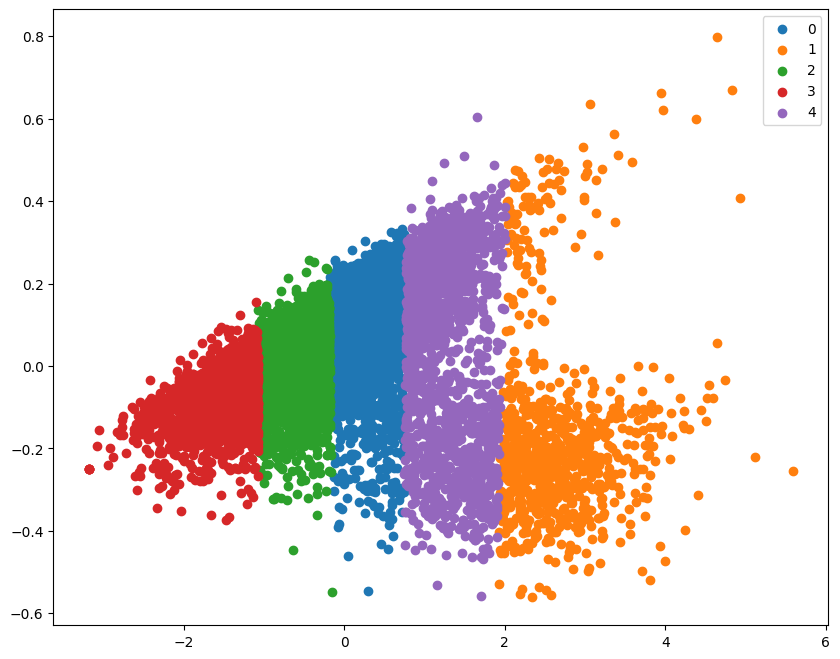

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# vectors가 리스트가 아니라면 리스트로 변환
if not isinstance(vectors, list):
    vectors = list(vectors)

# 벡터의 절반을 샘플링
sample_vectors = random.sample(vectors, len(vectors) // 2)

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

# PCA 결과를 데이터프레임에 추가
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# 각 군집을 다른 색상으로 표시하여 시각화
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(df[df['군집'] == i]['PCA1'], df[df['군집'] == i]['PCA2'], label=i)
plt.legend()
plt.show()

### 군집 중심 분석

C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cmhcm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


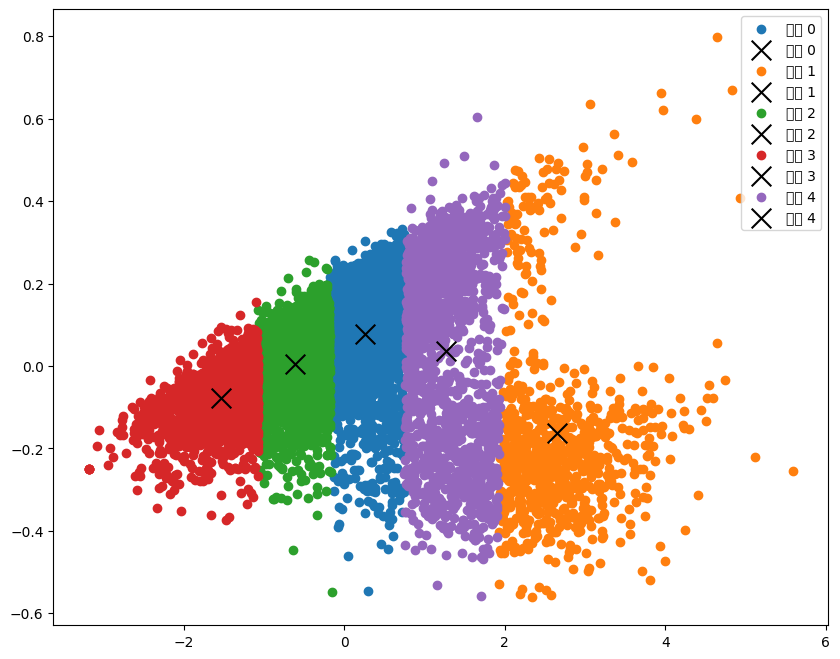

In [31]:
# 각 군집의 중심을 계산
centroids = df.groupby('군집')[['PCA1', 'PCA2']].mean()

# 시각화
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(df[df['군집'] == i]['PCA1'], df[df['군집'] == i]['PCA2'], label='군집 '+str(i))
    plt.scatter(centroids.loc[i, 'PCA1'], centroids.loc[i, 'PCA2'], label='중심 '+str(i), marker='x', s=200, c='black')  
plt.legend()
plt.show()


In [32]:
# 각 데이터의 군집 중심점까지의 거리를 계산
df['distance'] = df.apply(lambda row: np.linalg.norm(row[['PCA1', 'PCA2']] - centroids.loc[row['군집']]), axis=1)

# 각 군집에서 거리가 가장 짧은 데이터를 찾음
closest_points = df.loc[df.groupby('군집')['distance'].idxmin()]

closest_points


,news_id,news_date,news_keyword,news_feature,news_url,news_content,img_url,news_feature_cleaned,news_keyword_cleaned,summery_content,군집,PCA1,PCA2,distance
10110,01100701.20200421030311002,2020-04-21,세계 입맛 CJ 만두 토종 라면 국민간식 라면 만두 글로벌 식품 세계 K팝 영화 유...,미국 농심 짜파구리 한국 소비자 관계자 신제품 뉴욕 인플루언서 소비자들 부활절 k푸...,http://www.segye.com/content/html/2020/04/20/2...,2020-04-21국민간식인 라면과 만두가 글로벌 식품으로 거듭나고 있다. 세계 어...,https://www.bigkinds.or.kr/resources/images/01...,소비자 관계자 신제품 소비자들 부활절 k푸드 전자레인지 듀란 집밥 cj,세계 입맛 CJ 만두 토종 라면 국민간식 라면 만두 글로벌 식품 세계 K팝 영화 먹...,2020-04 21 국민 간식 라면 만두 글로벌 식품 거듭 세계 어디 서든 영화 유...,0,0.255563,0.074895,0.001609
2751,01100401.20230714030544001,2023-07-14,꽃무늬 수영복 13일 서울 중구 롯데백화점 본점 직원들 수영복 팝업 스토어 임시매장...,수영복 롯데백화점 서울 제품들 팝업스토어 해수욕장 임시매장 직원들 르망고 중구 9층...,https://www.donga.com/news/Economy/article/all...,2023-07-1413일 오전 서울 중구 롯데백화점 본점에서 직원들이 수영복 팝업스...,https://www.bigkinds.or.kr/resources/images/01...,수영복 제품들 팝업스토어 해수욕장 임시매장 직원들 르망고 9층 꽃무늬 본점 제품 스...,꽃무늬 수영복 13일 본점 직원들 수영복 팝업 스토어 임시매장 진열 제품들 해수욕장...,2023-07 1413일 오전 서울 중구 롯데 백화점 본점 직원 수영복 팝업 스토어...,1,2.637466,-0.150816,0.016546
7147,01100701.20220526132044001,2022-05-26,생기 패턴 자유 실루엣 선사 최고 여름 방역 지침 완화 날씨 일상 복귀 사람들 마음...,마르니 소비자 유니클로 이탈리아 리소 사람들 패브릭 라이프웨어 uniqlo 컬러감 ...,http://www.segye.com/content/html/2022/05/26/2...,2022-05-26방역 지침의 완화 따뜻한 날씨와 함께 일상으로 복귀하는 사람들의 ...,https://www.bigkinds.or.kr/resources/images/01...,소비자 리소 사람들 패브릭 라이프웨어 uniqlo 컬러감 볼드 marni 화장품,생기 패턴 자유 실루엣 선사 최고 여름 방역 지침 완화 날씨 일상 복귀 사람들 마음...,2022-05 26 방역 지침 완화 날씨 일상 복귀 사람 마음 훈풍 엔데믹 감염병 ...,2,-0.614167,0.004814,0.003415
3716,08100401.20230510073002001,2023-05-10,한국 노인 빈곤 고령층 임금 진행 나경철 앵커 출연 아나운서 이현웅 YTN 라디오 ...,이현웅 둘리 피해자 팝업스토어 고령자 구조금 한국 사용료 일자리 동아일보 최저임금 ...,https://www.ytn.co.kr/_ln/0103_202305100715580118,2023-05-10진행 나경철 앵커 출연 이현웅 YTN라디오 아나운서 아래 텍스트는...,https://www.bigkinds.or.kr/resources/images/08...,둘리 피해자 팝업스토어 고령자 구조금 사용료 일자리 고길동 근로자 가해자 가입자 o...,노인 빈곤 고령층 임금 진행 나경철 앵커 출연 아나운서 YTN 라디오 텍스트 실제 ...,2023-05 10 진행 나경 앵커 출연 이현웅 YTN 라디오 아나운서 아래 텍스트...,3,-1.540172,-0.074830,0.003631
7053,02100101.20220606110005004,2022-06-06,이마트24 사막 삼청동 팝업매장 이마트24 게임 사막 머스트잇 명품 플랫폼 블랙 콘...,이마트24 이마트 머스트잇 포토부스 삼청동 팝업스토어 24black 2층 관계자 부...,http://news.mk.co.kr/newsRead.php?no=495393&ye...,2022-06-06이마트24는 게임 검은사막 명품 플랫폼 머스트잇과 손잡고 블랙 콘...,https://www.bigkinds.or.kr/resources/images/02...,이마트24 팝업스토어 24black 2층 관계자 부스 실체화 기념사진 고객들 다크나...,이마트24 사막 팝업매장 이마트24 게임 사막 머스트잇 명품 플랫폼 팝업 스토어 2...,2022-06 06 이마트 24 게임 사막 명품 플랫폼 머스트 블랙 콘셉트 팝업 스...,4,1.239323,0.039820,0.026391


# 모델링

In [22]:
df_copy['news_keyword'] = df_copy['news_keyword'].str.replace(',', ' ')

## news_keyword 컬럼 데이터까지 추가하여 모델에 추가 학습(0229_01:20)

In [25]:
# 텍스트를 단어 리스트로 변환하되, 중복되는 단어는 제거합니다.
word_lists = [list(set(text.split())) for text in combined_data]

# FastText 모델에 데이터를 추가 학습시킵니다.
ko_model.build_vocab(word_lists, update=True)
ko_model.train(word_lists, total_examples=len(word_lists), epochs=ko_model.epochs)

(576065, 1403374)

In [26]:
# FastText 벡터화를 수행합니다.
vectors = []
for text in texts:
    words = [word for word in text.split() if word in ko_model.wv]
    if words:
        vector = np.mean([ko_model.wv[word] for word in words], axis=0)
    else:
        vector = np.zeros(ko_model.vector_size)  # 모델의 벡터 크기에 맞는 제로 벡터를 사용
    vectors.append(vector)

vectors = np.array(vectors)  # 벡터 리스트를 numpy array로 변환

# 벡터들 사이의 코사인 유사도를 계산합니다.
cosine_similarities = cosine_similarity(vectors)


In [27]:
# 코사인 유사도를 출력합니다.
print(cosine_similarities)

[[1.         0.97879303 0.97683444 ... 0.98055023 0.96233771 0.97604894]
 [0.97879303 1.         0.96816144 ... 0.98409936 0.96684871 0.97200724]
 [0.97683444 0.96816144 1.         ... 0.96732902 0.96139115 0.96602244]
 ...
 [0.98055023 0.98409936 0.96732902 ... 1.         0.95715374 0.97317708]
 [0.96233771 0.96684871 0.96139115 ... 0.95715374 1.         0.96369162]
 [0.97604894 0.97200724 0.96602244 ... 0.97317708 0.96369162 1.        ]]


In [28]:
# 각 행마다 유사도가 높은 상위 6개의 인덱스를 추출합니다.
top_6_indices = np.argsort(-cosine_similarities, axis=1)[:, :6]

# 첫 번째 항목 (즉, 자기 자신)을 제외합니다.
top_5_indices = top_6_indices[:, 1:]

# 해당 인덱스를 사용하여 news_ID를 찾습니다.
top_5_news_IDs = df_copy.loc[top_5_indices.flatten(), 'news_id'].values.reshape(-1, 5)

# 'Top_5'라는 새로운 컬럼에 news_ID를 저장합니다.
df_copy['Top_5'] = top_5_news_IDs.tolist()


In [29]:
# 자기 자신과의 유사도를 제외하고 각 행에서 가장 높은 유사도를 찾습니다.
np.fill_diagonal(cosine_similarities, -1)
best_similarities = np.max(cosine_similarities, axis=1)

# 'Best_similarities'라는 새로운 컬럼에 최대 유사도를 저장합니다.
df_copy['Best_similarities'] = best_similarities

In [30]:
df_copy.head()

,news_id,news_date,news_keyword,news_feature,news_url,news_content,img_url,summery_content,news_feature_words,news_feature_cleaned,Top_5,Best_similarities
0,02100201.20240214165525001,2024-02-14,나혼산 규현 바퀜 주문폭주 소요 배송 순수 원조 진공 용기 신세계 CJ 메가 플랫폼...,바퀜 규현 메이커빌 나혼산 신세계백화점 메가플랫폼 온오프라인 신세계 밀폐용기 보관력...,http://news.moneytoday.co.kr/view/mtview.php?n...,2024-02-14머니투데이 이동오 기자 순수 국내기술로 개발한 원조 진공용기신세계...,https://www.bigkinds.or.kr/resources/images/02...,2024-02 14 머니투데이 동오 기자 순수 국내 기술 개발 원조 진공 용기 신세...,"[바퀜, 규현, 메이커빌, 나혼산, 신세계백화점, 메가플랫폼, 온오프라인, 신세계,...",메가플랫폼 온오프라인 밀폐용기 보관력 온라인 짭퀜 프코크 cj,"[02100701.20230904174243001, 02100101.20220825...",0.990407
1,02100201.20240214161101001,2024-02-14,렌즈스토어 뷰티 렌즈 편집숍 윙크 울산 대구 오픈 뷰티 콘택트렌즈 플랫폼 윙크컴퍼니...,윙크컴퍼니 오프라인 뷰티렌즈 대구 울산 큐레이션 정문기 중구 남구 렌즈스토어,http://news.moneytoday.co.kr/view/mtview.php?n...,2024-02-14머니투데이 조한송 기자 뷰티 콘택트렌즈 플랫폼 윙크컴퍼니가 고객 ...,https://www.bigkinds.or.kr/resources/images/02...,2024-02 14 머니투데이 기자 뷰티 콘택트렌즈 플랫폼 윙크 컴퍼니 고객 경험 ...,"[윙크컴퍼니, 오프라인, 뷰티렌즈, 대구, 울산, 큐레이션, 정문기, 중구, 남구,...",윙크컴퍼니 오프라인 뷰티렌즈 정문기 렌즈스토어,"[01100401.20220523030447001, 02100201.20200829...",0.991671
2,01500601.20240214160335001,2024-02-14,대표이사 대구불로탁주 최종국 대표 이사 생물 도전장 지역 막걸리 글로벌 시장 막걸리...,대구 대구불로탁주 불로막걸리 품평회 생막걸리 양조장 대한민국 한국막걸리협회 동구 생...,https://www.imaeil.com/page/view/2024021314385...,2024-02-14막걸리는 살아있는 생물입니다. 지역 전통 막걸리의 맛을 전국을 넘...,https://www.bigkinds.or.kr/resources/images/01...,2024-02 14 막걸리 생물 지역 전통 막걸리 전국 세계 시장 계획 50 이상 ...,"[대구, 대구불로탁주, 불로막걸리, 품평회, 생막걸리, 양조장, 대한민국, 한국막걸...",대구불로탁주 불로막걸리 품평회 생막걸리 양조장 한국막걸리협회 동구 생효모 경쟁력,"[01500501.20230517181905001, 01300101.20230329...",0.989646
3,07100501.20240214144618001,2024-02-14,신세계 강남점 엄브로 단독 주년 팝업 선봬 신세계백화점 영국 스포츠 브랜드 엄브로 ...,엄브로 강남점 영국 혼네 신세계백화점 주년 론칭 굿즈 엄브 일상복 선현우 신세계 팝...,http://www.etnews.com/20240214000260,2024-02-14신세계백화점은 영국 스포츠 브랜드 엄브로 론칭 100주년을 맞아 ...,https://www.bigkinds.or.kr/resources/images/07...,2024-02 14 신세계 백화점 영국 스포츠 브랜드 엄브로 론칭 100 주년 업계...,"[엄브로, 강남점, 영국, 혼네, 신세계백화점, 주년, 론칭, 굿즈, 엄브, 일상복...",강남점 주년 론칭 굿즈 엄브 일상복 선현우 팝업스토어 선착순 듀오 런드리 20만 포...,"[02100851.20240214060228001, 02100501.20240214...",0.997985
4,02100501.20240214103102002,2024-02-14,신세계 강남점 엄브로 단독 주년 팝업 신세계백화점 영국 스포츠 브랜드 엄브로 론칭 ...,영국 엄브로 엄브 신세계백화점 주년 론칭 강남점 신세계 축구팀 일상복 오랫동안 선현...,http://www.fnnews.com/news/202402141025245334,2024-02-14파이낸셜뉴스 신세계백화점은 영국 스포츠 브랜드 엄브로의 론칭 10...,https://www.bigkinds.or.kr/resources/images/02...,2024-02 14 파이낸셜뉴스 신세계 백화점 영국 스포츠 브랜드 엄브로 론칭 10...,"[영국, 엄브로, 엄브, 신세계백화점, 주년, 론칭, 강남점, 신세계, 축구팀, 일...",주년 론칭 강남점 축구팀 일상복 오랫동안 선현우 팝업스토어 블록코어 매력적 믹스매치...,"[02100851.20240214060228001, 07100501.20240214...",0.998175


In [35]:
df.loc[df['news_id'] == '01100401.20220523030447001']

,news_id,news_date,news_keyword,news_feature,news_url,news_content,img_url
7172,01100401.20220523030447001,2022-05-23,"인증샷,피팅룸,옥상,풋살경기장,쇼핑,유통업체들,잰걸음,매장,차별,건물,스튜디오,공간...","서울,피팅룸,팝업스토어,강남,팬덤,오프라인,시코르,테이스팅탭,전통문화,박물관,포토존...",https://www.donga.com/news/article/all/2022052...,2022-05-23오프라인 유통업체들이 거리 두기 해제에 맞춰 매장 차별화 경쟁에 ...,https://www.bigkinds.or.kr/resources/images/01...


# 최종 평균 유사도: 0.9941001628326447

In [32]:
# 'Best_similarities' 컬럼의 평균 유사도를 계산합니다.
average_similarity = df_copy['Best_similarities'].mean()

print("평균 유사도: ", average_similarity)

평균 유사도:  0.9941001628326447
